<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Start Here
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [2]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [9]:
df['reviews.text'][0:20]

0     I order 3 of them and one of the item is bad q...
1     Bulk is always the less expensive way to go fo...
2     Well they are not Duracell but for the price i...
3     Seem to work as well as name brand batteries a...
4     These batteries are very long lasting the pric...
5     Bought a lot of batteries for Christmas and th...
6     ive not had any problame with these batteries ...
7     Well if you are looking for cheap non-recharge...
8     These do not hold the amount of high power jui...
9     AmazonBasics AA AAA batteries have done well b...
10    I find amazon basics batteries to be equal if ...
11    When I first started getting the Amazon basic ...
12    Use it for my fish tank's light at night and w...
13    just got em so I can't really comment on how g...
14    we have many things that need aa battery they ...
15    Thankful that I was able to find on Amazon for...
16    I don't know if I would buy thus brand again s...
17    In my opinion these did not last anywhere 

In [3]:
STOPWORDS = set(STOPWORDS).union(set(['a', 'and', 'the']))

def tokenize(text):
    """Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

df['tokens'] = df['reviews.text'].apply(tokenize)
df.tokens

0        [order, item, bad, quality, missing, backup, s...
1                   [bulk, expensive, way, products, like]
2                                 [duracell, price, happy]
3                  [work, brand, batteries, better, price]
4                 [batteries, long, lasting, price, great]
                               ...                        
28327    [got, yr, old, twins, yr, old, better, perfect...
28328    [bought, niece, christmas, gift, years, old, l...
28329    [nice, light, internet, browsing, keeping, ema...
28330    [tablet, absolutely, want, watch, tv, shows, m...
28331    [ninety, dollars, expectionations, low, good, ...
Name: tokens, Length: 28332, dtype: object

In [4]:
# A Dictionary Representation of all the words in our corpus
# corpora is a gensim function
id2word = corpora.Dictionary(df.tokens)

In [16]:
id2word.token2id['christmas']

32

In [25]:
#id2word.doc2bow(tokenize("This is a sample message Darcy England England England"))
print(id2word)

Dictionary(9621 unique tokens: ['aluminum', 'backup', 'bad', 'battery', 'item']...)


In [18]:
import sys
print(sys.getsizeof(id2word))
print(sys.getsizeof(df.tokens))
# id2word dictionary (gensim corpora) format is much more memory efficient than a column of tokens

56
4567040


In [26]:
len(id2word)

9621

In [27]:
# Let's remove extreme values from the dataset
# below refers to an absolute number, above refers a percent of the corpus
id2word.filter_extremes(no_below=5, no_above=0.95)

In [28]:
len(id2word)

3581

In [5]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
# Although abstracted away - tokenization IS happening in the doc_stream f(x)
corpus = [id2word.doc2bow(text) for text in df.tokens]

In [6]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 12,
                   passes=10,
                   workers=12
                  )

In [7]:
lda.print_topics()

[(0,
  '0.125*"good" + 0.048*"tablet" + 0.036*"price" + 0.016*"great" + 0.016*"buy" + 0.016*"recommend" + 0.015*"product" + 0.015*"value" + 0.014*"best" + 0.012*"batteries"'),
 (1,
  '0.038*"kindle" + 0.035*"books" + 0.031*"use" + 0.025*"reading" + 0.025*"read" + 0.023*"tablet" + 0.023*"easy" + 0.021*"love" + 0.021*"great" + 0.015*"screen"'),
 (2,
  '0.049*"easy" + 0.032*"use" + 0.019*"love" + 0.019*"tablet" + 0.018*"light" + 0.013*"great" + 0.012*"like" + 0.011*"screen" + 0.011*"kindle" + 0.010*"price"'),
 (3,
  '0.063*"kindle" + 0.012*"bought" + 0.012*"best" + 0.011*"charge" + 0.010*"read" + 0.010*"love" + 0.010*"case" + 0.009*"got" + 0.008*"screen" + 0.007*"black"'),
 (4,
  '0.025*"apps" + 0.021*"like" + 0.017*"amazon" + 0.014*"tablet" + 0.014*"kids" + 0.012*"better" + 0.010*"use" + 0.009*"screen" + 0.009*"store" + 0.009*"device"'),
 (5,
  '0.051*"loves" + 0.046*"old" + 0.043*"bought" + 0.034*"year" + 0.032*"love" + 0.031*"tablet" + 0.019*"daughter" + 0.018*"use" + 0.017*"games" + 0

In [8]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
good tablet price great buy

------ Topic 1 ------
kindle books use reading read

------ Topic 2 ------
easy use love tablet light

------ Topic 3 ------
kindle bought best charge read

------ Topic 4 ------
apps like amazon tablet kids

------ Topic 5 ------
loves old bought year love

------ Topic 6 ------
great long time batteries battery

------ Topic 7 ------
great tablet kids loves games

------ Topic 8 ------
year bought old tablet kindle

------ Topic 9 ------
great price tablet good quality

------ Topic 10 ------
batteries price great work amazon

------ Topic 11 ------
tablet amazon great kids good



In [9]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [10]:
pyLDAvis.gensim.prepare(lda,corpus,id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.236189 -0.001053       1        1  19.415192
11    -0.046637 -0.013490       2        1   9.791605
1     -0.108528  0.091464       3        1   9.289930
5     -0.156898 -0.102164       4        1   8.548974
4     -0.034864  0.067859       5        1   8.270283
7     -0.125743 -0.174739       6        1   7.708050
0      0.118980 -0.048835       7        1   6.874117
8     -0.010950  0.052984       8        1   6.304338
6      0.155635 -0.064685       9        1   6.132370
9      0.030076 -0.041777      10        1   6.007970
3     -0.066669  0.139083      11        1   5.969952
2      0.009410  0.095352      12        1   5.687220, topic_info=           Term         Freq        Total Category  logprob  loglift
19    batteries  6741.000000  6741.000000  Default  30.0000  30.0000
35         good  4825.000000  4825.000000  Default  29.0000  29.0000
22        great  9040.000000  9040.000000  Default  28.0000  28.0000
3156     kindle  3249.000000  3249.000000  Default  27.0000  27.0000
2616      loves  2217.000000  2217.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
30          buy    89.889679  2218.530029  Topic12  -5.3079  -0.3391
235        best    79.877281  1505.466553  Topic12  -5.4260  -0.0694
205         far    77.297852  1122.545044  Topic12  -5.4589   0.1913
10         work    81.115669  2186.959961  Topic12  -5.4107  -0.4274
183        time    80.036331  1915.264648  Topic12  -5.4241  -0.3082

[1016 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
58        1  0.944863    aa
58        2  0.002244    aa
58        7  0.006733    aa
58        8  0.006733    aa
58        9  0.029176    aa
...     ...       ...   ...
6330      8  0.186923   äôt
6330     11  0.577762   äôt
6330     12  0.101958   äôt
8922      2  0.086046  äôve
8922      8  0.860458  äôve

[3669 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 12, 2, 6, 5, 8, 1, 9, 7, 10, 4, 3])

In [11]:
lda[corpus[0]]

[(10, 0.9234947)]

In [12]:
distro = [lda[d] for d in corpus]
print(distro[0:10])

[[(10, 0.9234945)], [(0, 0.013889687), (1, 0.013889684), (2, 0.013889628), (3, 0.01388959), (4, 0.01388996), (5, 0.013889495), (6, 0.013889818), (7, 0.0138895195), (8, 0.013889692), (9, 0.013889693), (10, 0.8472136), (11, 0.01388962)], [(0, 0.02083702), (1, 0.020836715), (2, 0.020836331), (3, 0.020836053), (4, 0.020836283), (5, 0.020836448), (6, 0.020840498), (7, 0.02083689), (8, 0.020835338), (9, 0.02083582), (10, 0.7707963), (11, 0.020836314)], [(0, 0.013889214), (1, 0.013889064), (2, 0.013889087), (3, 0.013889059), (4, 0.0138891805), (5, 0.013889048), (6, 0.013889117), (7, 0.013889046), (8, 0.0138890445), (9, 0.013889183), (10, 0.8472199), (11, 0.013889064)], [(0, 0.013889455), (1, 0.01388909), (2, 0.013889154), (3, 0.013889042), (4, 0.01388907), (5, 0.01388911), (6, 0.57199764), (7, 0.01388939), (8, 0.013889081), (9, 0.01388953), (10, 0.28911024), (11, 0.013889155)], [(10, 0.9601378)], [(0, 0.011919154), (1, 0.011919106), (2, 0.011919124), (3, 0.011919049), (4, 0.011918913), (5, 0.

In [14]:
# determine the appropriate number of topics

from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [15]:
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=3, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=1)

In [16]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-2.678539
1,0,5,-2.617520
2,0,7,-2.702770
3,0,9,-2.630992
4,0,11,-2.615545


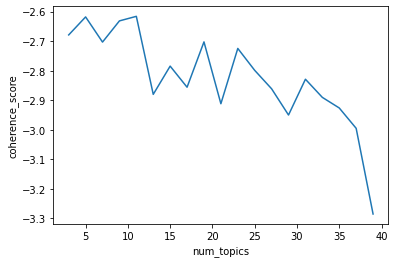

In [17]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling